# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_def/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = 'control_cmaq.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-01-12:00:00',
  'end_time': '2019-08-02-12:00:00',
  'output_dir': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/processed/Aug_2021/0801/'},
 'model': {'cmaq_oper': {'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_oper/gpfs_prod_aqm/0801/aqm.t12z.aconc_sfc.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 18000,
   'mapping': {'airnow': {'CO': 'CO',
     'NO': 'NO',
     'NO2': 'NO2',
     'PM25_TOT': 'PM2.5',
     'O3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'dodgerblue', 'marker': '+', 'linestyle': '-.'}},
  'cmaq_expt': {'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0801/aqm.20190801.t12z.aconc-pm25.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 18000,
   'mapping': {'airnow': {'CO': 'CO',
     'NO2': 'NO2',
     'NO': 'NO',
     'PM25_TOT': 'PM2.5',
     'O3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

cmaq_oper
{'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_oper/gpfs_prod_aqm/0801/aqm.t12z.aconc_sfc.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 18000, 'mapping': {'airnow': {'CO': 'CO', 'NO': 'NO', 'NO2': 'NO2', 'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'dodgerblue', 'marker': '+', 'linestyle': '-.'}}
/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_oper/gpfs_prod_aqm/0801/aqm.t12z.aconc_sfc.ncf


/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_def/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


cmaq_expt
{'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0801/aqm.20190801.t12z.aconc-pm25.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 18000, 'mapping': {'airnow': {'CO': 'CO', 'NO2': 'NO2', 'NO': 'NO', 'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}}
/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0801/aqm.20190801.t12z.aconc-pm25.ncf


/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_def/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


rrfs_25km
{'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/rrfs-cmaq/cases-1a6a7181/2019080112/dynf*.nc', 'mod_type': 'rrfs', 'radius_of_influence': 37500, 'mapping': {'airnow': {'co': 'CO', 'no2': 'NO2', 'no': 'NO', 'PM25': 'PM2.5', 'o3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'purple', 'marker': 'x', 'linestyle': '--'}}
/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/rrfs-cmaq/cases-1a6a7181/2019080112/dynf*.nc
[########################################] | 100% Completed |  5.5s
[########################################] | 100% Completed |  5.6s
[########################################] | 100% Completed |  5.7s
[########################################] | 100% Completed |  5.7s
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s
[###############

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

In [5]:
an.models

{'cmaq_oper': <driver.model at 0x7f33bd1e60b8>,
 'cmaq_expt': <driver.model at 0x7f33e3408c18>,
 'rrfs_25km': <driver.model at 0x7f33a4116668>}

In [6]:
#an.models['cmaq_oper'].obj
an.models['rrfs_25km'].obj
#an.models['rrfs_25km'].obj.isel(z=0).expand_dims('z',axis=1)

<xarray.Dataset>
Dimensions:        (time: 25, x: 191, y: 97, z: 64)
Coordinates:
    longitude      (y, x) float64 dask.array<chunksize=(97, 191), meta=np.ndarray>
    latitude       (y, x) float64 dask.array<chunksize=(97, 191), meta=np.ndarray>
  * time           (time) datetime64[ns] 2019-08-01T12:05:00 ... 2019-08-02T1...
    pres_pa        (time, z, y, x) float32 1.013e+05 1.013e+05 ... 37.92 37.92
    geohgt_m       (time, z, y, x) float32 dask.array<chunksize=(1, 32, 97, 191), meta=np.ndarray>
Dimensions without coordinates: x, y, z
Data variables: (12/214)
    aacd           (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    aalj           (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    aalk1j         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    aalk2j         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    abnz1j         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    abnz2j         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    ...             ...
    pm25_ca        (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    pm25_na        (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    pm25_nh4       (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    pm25_no3       (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    pm25_so4       (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    pm25_om        (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
Attributes: (12/16)
    hydrostatic:  non-hydrostatic
    ncnsto:       194
    ak:           [2.0000000e+01 6.4247000e+01 1.3779000e+02 2.2195800e+02 3....
    bk:           [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0....
    source:       FV3GFS
    grid:         lambert_conformal
    ...           ...
    nx:           191
    ny:           97
    lon1:         -120.7296237
    lat1:         25.11648583
    dx:           25000.0
    dy:           25000.0

In [ ]:
#All the info in the model class can be called here.
print(an.models['cmaq_oper'].label)
print(an.models['cmaq_oper'].mapping)

In [ ]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)
print(an.download_maps)

### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [ ]:
an.open_obs()

In [ ]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

In [ ]:
#This just pairs the data
an.pair_data()

In [ ]:
#And this generates all the plots.
an.plotting()

In [ ]:
an.stats()

[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed |  1.1s
[########################################] | 100% Completed |  1.2s


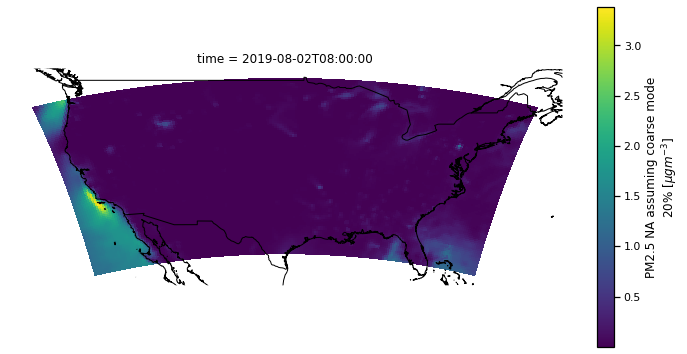

In [7]:
an.models['rrfs_25km'].obj.pm25_na[20,0,:,:].monet.quick_map()

[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s


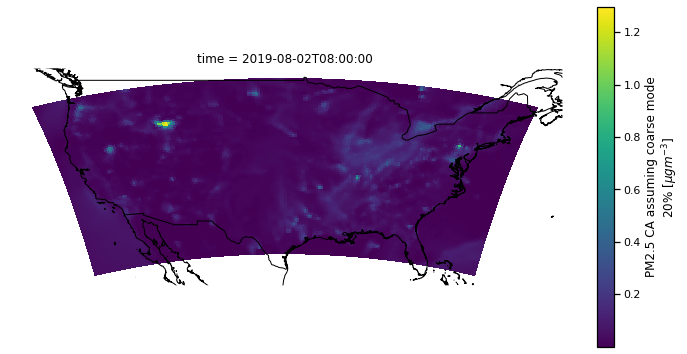

In [8]:
an.models['rrfs_25km'].obj.pm25_ca[20,0,:,:].monet.quick_map()

[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s


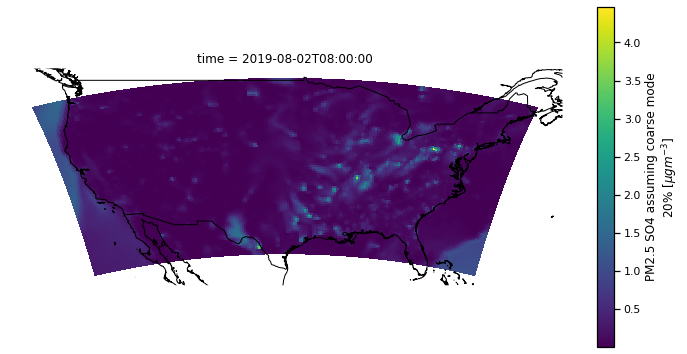

In [9]:
an.models['rrfs_25km'].obj.pm25_so4[20,0,:,:].monet.quick_map()

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.4s


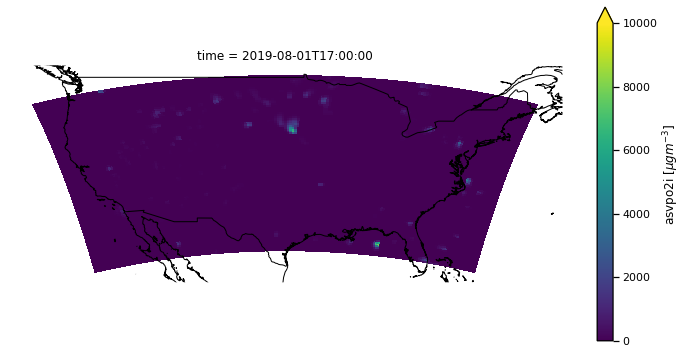

In [20]:
an.models['rrfs_25km'].obj.asvpo2i[5,0,:,:].monet.quick_map(vmin=0,vmax=10000)

[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.7s


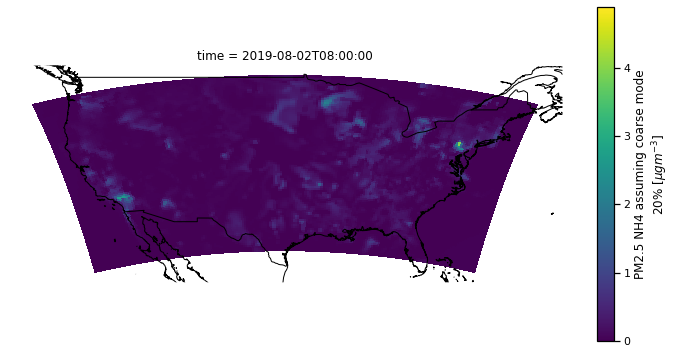

In [21]:
an.models['rrfs_25km'].obj.pm25_nh4[20,0,:,:].monet.quick_map()

[########################################] | 100% Completed |  5.8s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  5.9s
[########################################] | 100% Completed |  5.9s


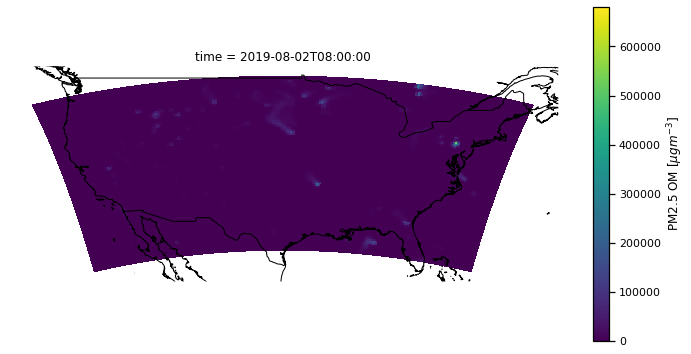

In [22]:
an.models['rrfs_25km'].obj.pm25_om[20,0,:,:].monet.quick_map()

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s


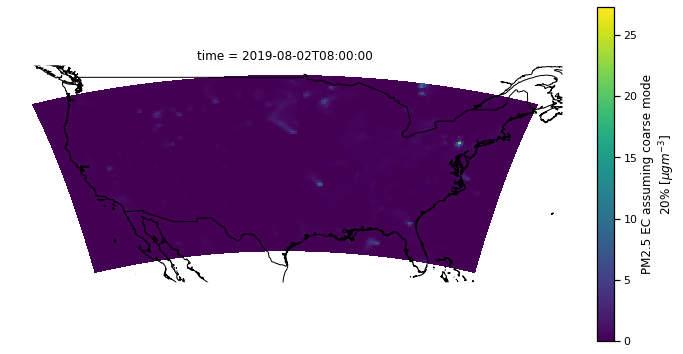

In [23]:
an.models['rrfs_25km'].obj.pm25_ec[20,0,:,:].monet.quick_map()